### Introduction

###### In this project, the problem that we will be investigating is binary classification. We will use numbers of different features (information) about patients to predict whether they will survive the first year after surgery.
###### The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients after thoracic surgery in which there are two classes class 1 - the death of patients within one year after surgery and class 2 – the patients who survive.


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [130]:
df=pd.read_csv(r"C:\edubridge datas\ThoraricSurgery.CSV")

In [131]:
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


#### Features description

- ID
- DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
- PRE4: Forced vital capacity - FVC (numeric)
- PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
- PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
- PRE7: Pain before surgery (T,F)
- PRE8: Haemoptysis before surgery (T,F)
- PRE9: Dyspnoea before surgery (T,F)
- PRE10: Cough before surgery (T,F)
- PRE11: Weakness before surgery (T,F)
- PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
- PRE17: Type 2 DM - diabetes mellitus (T,F)
- PRE19: MI up to 6 months (T,F)
- PRE25: PAD - peripheral arterial diseases (T,F)
- PRE30: Smoking (T,F)
- PRE32: Asthma (T,F)
- AGE: Age at surgery (numeric)
- Risk1Y: 1 year survival period - (T)rue value if died (T,F)


##### READING FRIST 5 ROWS

In [132]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


##### READING FINAL 5 ROWS

In [133]:
df.tail()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F
469,470,DGN3,4.72,3.56,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F


##### STATISTICAL ANALYSIS OF DATA

In [134]:
df.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


##### STATISTICAL ANALUSIS OF BOTH QUANTITATIVE AND QUALITATIVE DATA

In [135]:
df.describe(include="all")

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470.000000,470,470.000000,470.000000,470,470,470,470,470,470,470,470,470,470,470,470,470.000000,470
unique,NaN,7,NaN,NaN,3,2,2,2,2,2,4,2,2,2,2,2,NaN,2
top,NaN,DGN3,NaN,NaN,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,NaN,F
freq,NaN,349,NaN,NaN,313,439,402,439,323,392,257,435,468,462,386,468,NaN,400
mean,235.500000,NaN,3.281638,4.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.534043,NaN
std,135.821574,NaN,0.871395,11.767857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.706902,NaN
min,1.000000,NaN,1.440000,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
25%,118.250000,NaN,2.600000,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN
50%,235.500000,NaN,3.160000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN
75%,352.750000,NaN,3.807500,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN


#### FETCHING ALL INFORMATION ABOUT DATASET

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


##### CHECKING THE EXISTANCE OF NULL VALUE
- In this dataset there is no null value

In [141]:
df.isnull().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

##### shape of the dataset
- this particular surgery dataset contain 470 row and 18 column

In [137]:
df.shape

(470, 18)

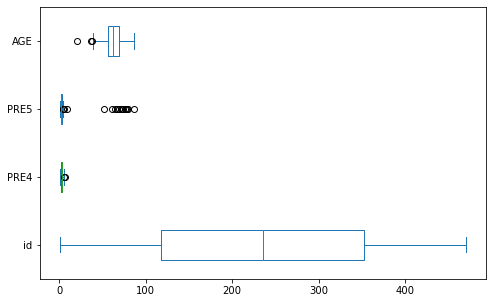

In [138]:
df.plot(kind='box',figsize=(8,5),vert=False)
plt.show()

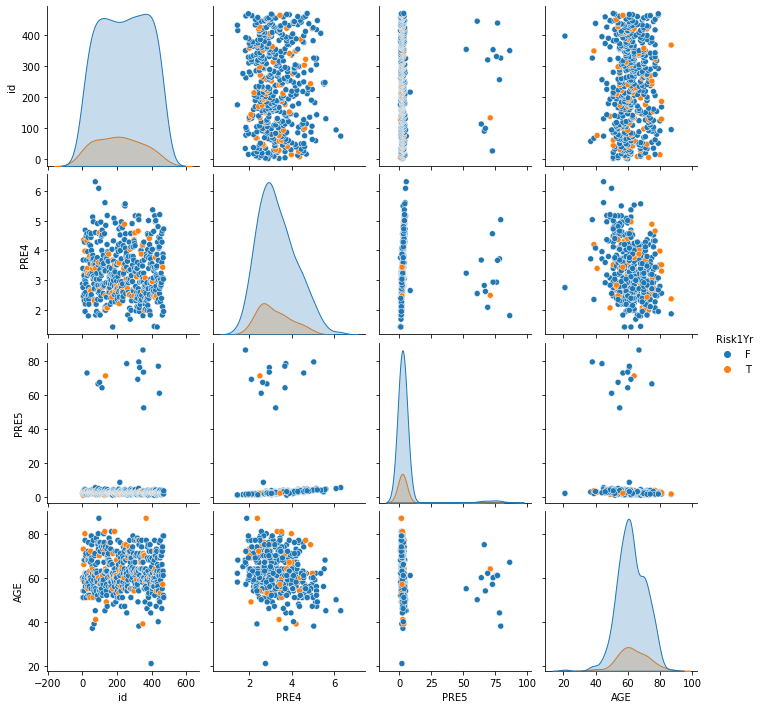

In [140]:
sns.pairplot(df,hue='Risk1Yr')
plt.show()

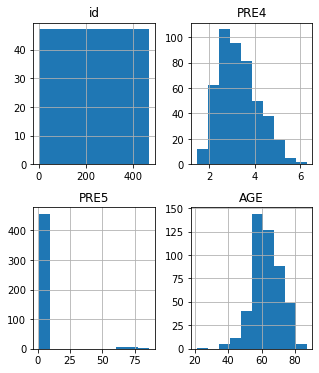

In [142]:
df.hist(figsize=(5,6))
plt.show()

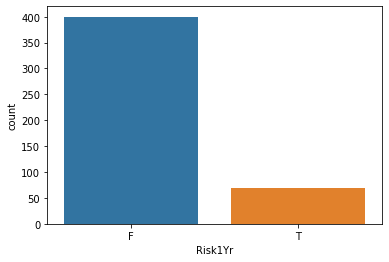

In [145]:
sns.countplot(df['Risk1Yr'])
plt.show()

##### ELIMINATING UNWANTED COLUMN PERMENANTLY
-id and age are eliminated fro the dataset

In [15]:
df.drop(['id','AGE'],axis=1,inplace=True)

In [16]:
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,F


##### REPLACING ALL VALUE TO THE NUMERICAL VALUE FOR BETTER ANALYSIS

In [102]:
df.DGN=df.DGN.replace({"DGN1":0,"DGN2":1,"DGN3":2,"DGN4":3,"DGN5":4,"DGN6":5,"DGN8":6})
df.PRE6=df.PRE6.replace({"PRZ0":0,"PRZ1":1,"PRZ2":2})
df.PRE7=df.PRE7.replace({"F":0,"T":1})
df.PRE8=df.PRE8.replace({"F":0,"T":1})
df.PRE9=df.PRE9.replace({"F":0,"T":1})
df.PRE10=df.PRE10.replace({"F":0,"T":1})
df.PRE11=df.PRE11.replace({"F":0,"T":1})
df.PRE19=df.PRE19.replace({"F":0,"T":1})
df.PRE17=df.PRE17.replace({"F":0,"T":1})
df.PRE25=df.PRE25.replace({"F":0,"T":1})
df.PRE30=df.PRE30.replace({"F":0,"T":1})
df.PRE32=df.PRE32.replace({"F":0,"T":1})
df.PRE14=df.PRE14.replace({"OC11":0,"OC12":1,"OC13":2,"OC14":3})

In [103]:
df

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,Risk1Yr
0,0,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,F
1,1,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,F
2,1,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,F
3,1,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,F
4,1,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,F
466,1,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,F
467,1,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,F
468,1,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,F


##### setting independent variables as x


In [104]:
x=df.drop('Risk1Yr',axis=1)
x

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32
0,0,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0
1,1,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0
2,1,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0
3,1,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0
466,1,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0
467,1,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0
468,1,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0


##### DEPENDENT VARIABLE IS CONSIDERED AS RISK1YR THAT IS SET IN Y VARIABLE

In [105]:
y=df.Risk1Yr
y

0      F
1      F
2      F
3      F
4      T
      ..
465    F
466    F
467    F
468    F
469    F
Name: Risk1Yr, Length: 470, dtype: object

##### PERFORM SPLITING OF DATA FOR TRAIN AND TEST

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [108]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(376, 15)
(94, 15)
(376,)
(94,)


#### DEFINING THE MODEL AND TRAIN THE DATA
- Here using 80 percent trained data and 20 percent test data for classification

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
model=DecisionTreeClassifier()

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
y_predict=model.predict(x_test)
y_predict

array(['F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'F',
       'T', 'F', 'F', 'T', 'F', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'T', 'F', 'F', 'T', 'F', 'F', 'F', 'T', 'T',
       'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F',
       'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'F',
       'F', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F',
       'T', 'F', 'F', 'F', 'F', 'T', 'F', 'F', 'F', 'F', 'T', 'F', 'F',
       'F', 'F', 'F'], dtype=object)

##### ACCURACY CALCULATION OF MODEL

In [114]:
accuracy_score(y_test,y_predict)*100

78.72340425531915

In [115]:
df=pd.DataFrame({"Actual":y_test,"predicted":y_predict})

In [116]:
df

,Actual,predicted
9,F,F
21,F,F
161,F,F
40,T,F
450,F,F
...,...,...
440,F,F
251,T,F
310,F,F
48,F,F


In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
performance=confusion_matrix(y_test,y_predict)

In [119]:
performance

array([[67, 14],
       [ 6,  7]], dtype=int64)

In [120]:
from sklearn.metrics import plot_confusion_matrix

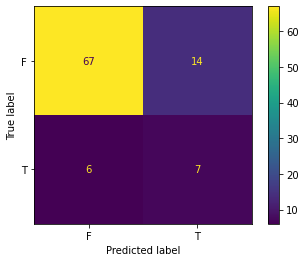

In [121]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

#### MAKING DECISION TREE BASED ON THE ANALYSIS 

In [122]:
from sklearn import tree

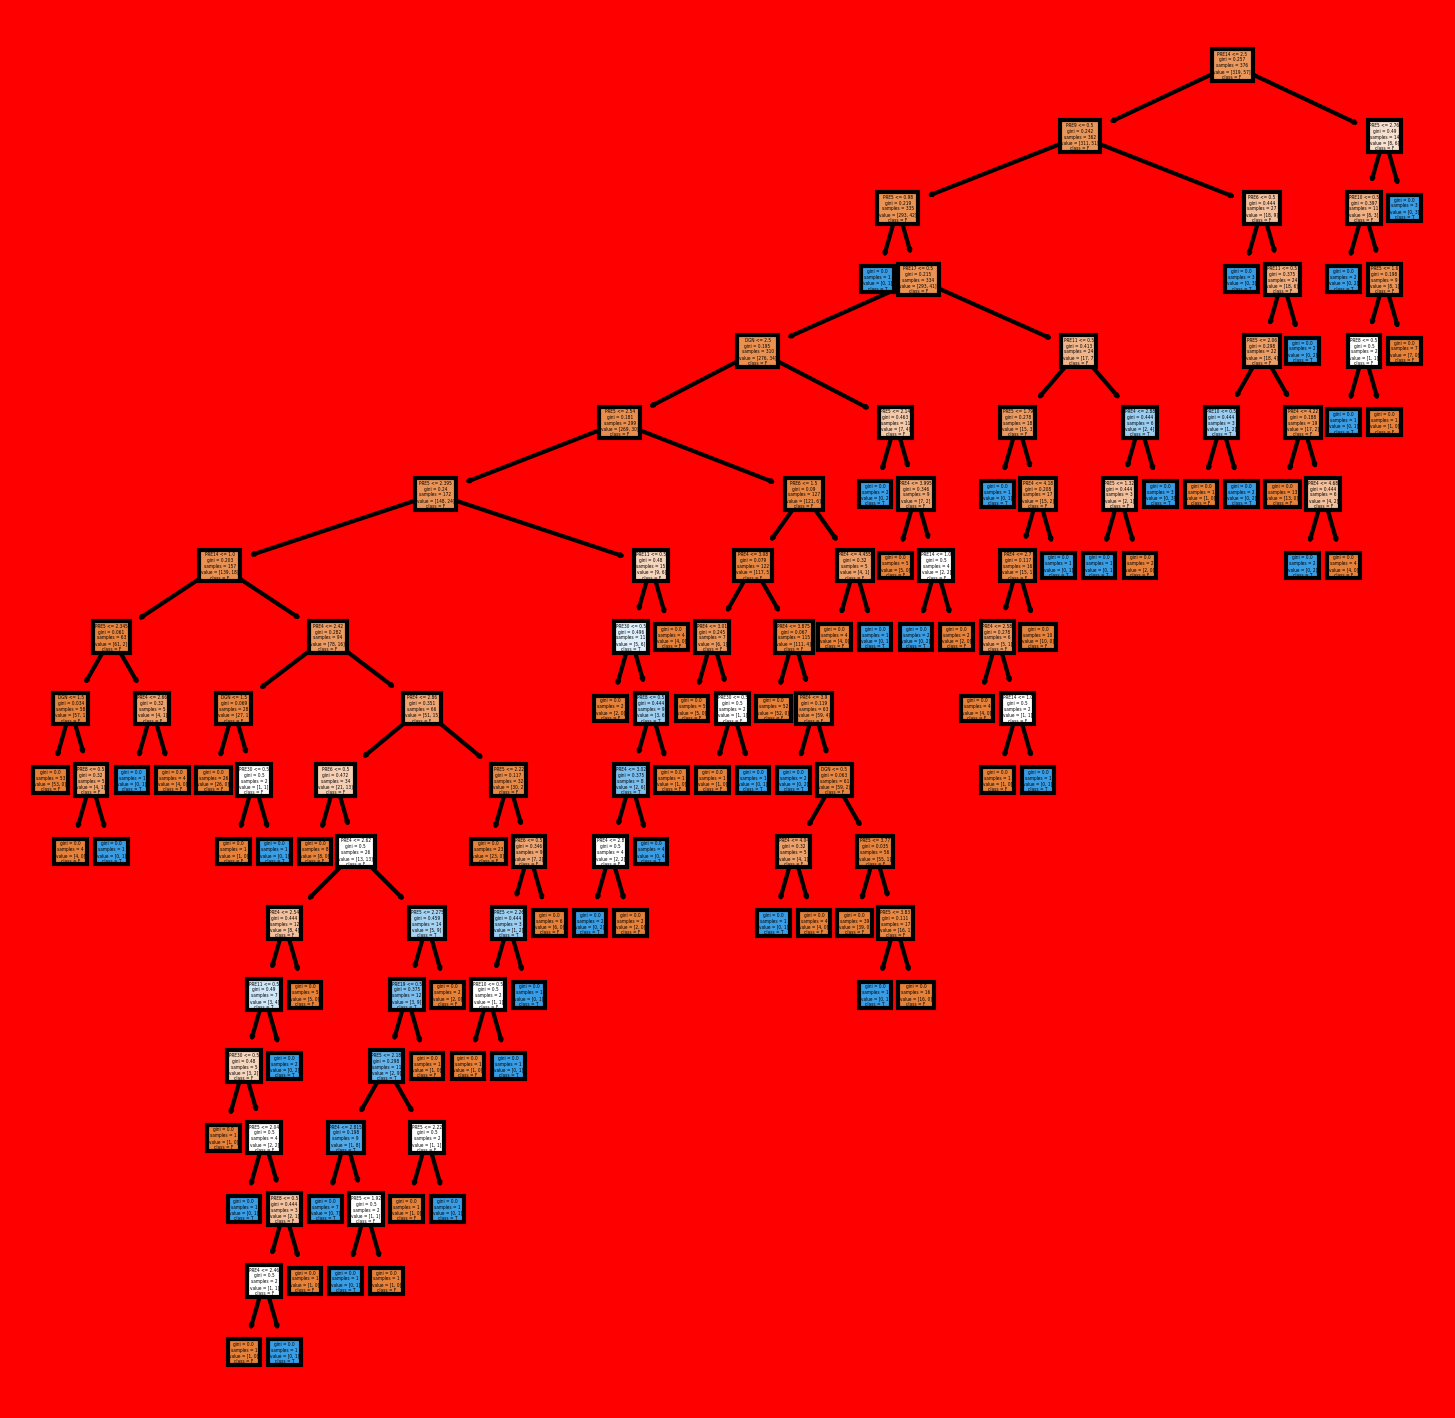

In [125]:
feature_names=['DGN','PRE4','PRE5','PRE6','PRE7','PRE8','PRE9','PRE10','PRE11','PRE14','PRE17','PRE19','PRE25','PRE30','PRE32']
class_names=['F','T']
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=300,facecolor='r')
tree.plot_tree(model,feature_names=feature_names,class_names=class_names,filled=True)
fig.savefig('surgery.png')

#### CONCLUSION
- The model have 78 percentage accuracy
- Acoording tothe analysis the no.of patient in class 1 is less than as compared with claas 2
- so we can conclude that in this  classification problem of after thoracic surgery in the more patient is survived after surgery
-  more than 70 percentage patients are in no risk sector after surgery and below 30 percentage patients are in high risk catecory